Index(['Level', 'Frontier', 'Time (s)', 'Memory Used (MB)', 'Solution length',
       'States Generated'],
      dtype='object')
                                                Level  Frontier  Time (s)  \
0                                                SAD1       BFS     0.151   
1                                                SAD1       DFS     0.102   
2                                                SAD2       BFS    67.547   
3                                                SAD2       DFS     0.089   
4                                       SAfriendofDFS       BFS    58.089   
5                                       SAfriendofDFS       DFS     0.171   
6                                       SAfriendofBFS       BFS     0.455   
7                                       SAfriendofBFS       DFS     24.14   
8                                           SAFirefly       BFS     27.82   
9                                           SAFirefly       DFS     24.06   
10                      

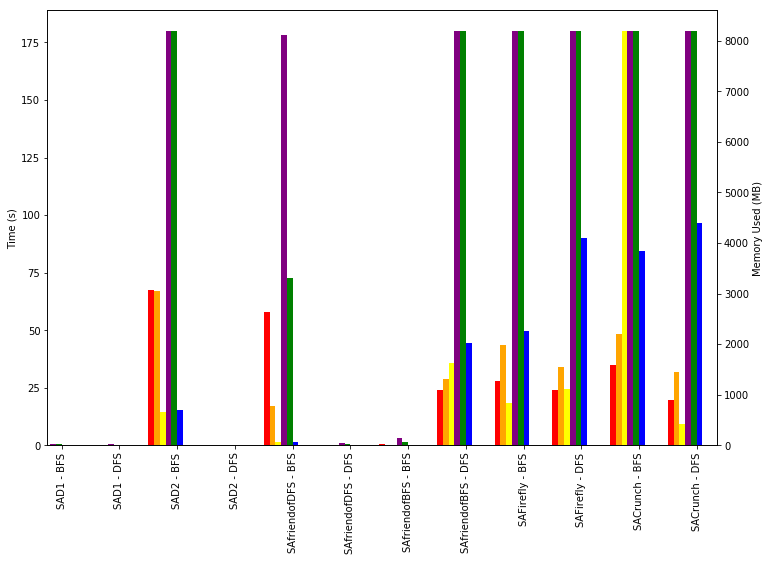

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd

df = pd.read_excel (r'benchmarks.xlsx', skiprows=2)
data = df.drop([13,28], axis=0)
print(df.columns)
df['Name'] = df[['Level','Frontier']].apply(lambda x : '{} - {}'.format(x[0],x[1]), axis=1)
df1 = df[0:12]
df2 = df[15:27]
df3 = df[30:42]
# lvls = list(df['Level'])
# alg = list(df['Frontier'])
# levels = [str(lvls[i]) + "_" + str(alg[i]) for i in range(0, 12)]
# print(levels[0:12])
# times = list(df['Time (s)'])
# mem = list(df['Memory Used (MB)'])

print(df)
#df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure(figsize=(12,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.1

df1['Time (s)'].plot(kind='bar', color='red', ax=ax, width=width, position=5)
df2['Time (s)'].plot(kind='bar', color='orange', ax=ax, width=width, position=4)
df3['Time (s)'].plot(kind='bar', color='yellow', ax=ax, width=width, position=3)
df1['Memory Used (MB)'].plot(kind='bar', color='purple', ax=ax2, width=width, position=2)
df2['Memory Used (MB)'].plot(kind='bar', color='green', ax=ax2, width=width, position=1)
df3['Memory Used (MB)'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Time (s)')
ax2.set_ylabel('Memory Used (MB)')
plt.xlabel('Level and Frontier')
ax.set_xticklabels(list(df['Name']))

plt.show()

      Level Size Time_(s) Memory_Used_(MB) Solution_length States_Generated
0   SAsoko1    4    0.016             3.59               2                3
1   SAsoko1    8    0.017             3.59               6               15
2   SAsoko1   16    0.024             3.59              14               68
3   SAsoko1   32    0.034                4              30              266
4   SAsoko1   64    0.054             6.28              62             1034
5   SAsoko1  128     0.15            10.09             126             4128
6   SAsoko2    4    0.019             3.59               2               44
7   SAsoko2    8    0.047              5.4               6              660
8   SAsoko2   16    0.329            21.27              14             8580
9   SAsoko2   32    3.686           515.72              30           118093
10  SAsoko2   64   98.825             8192             NaN           808491
11  SAsoko2  128   65.836             8192             NaN           221993
12  SAsoko3 

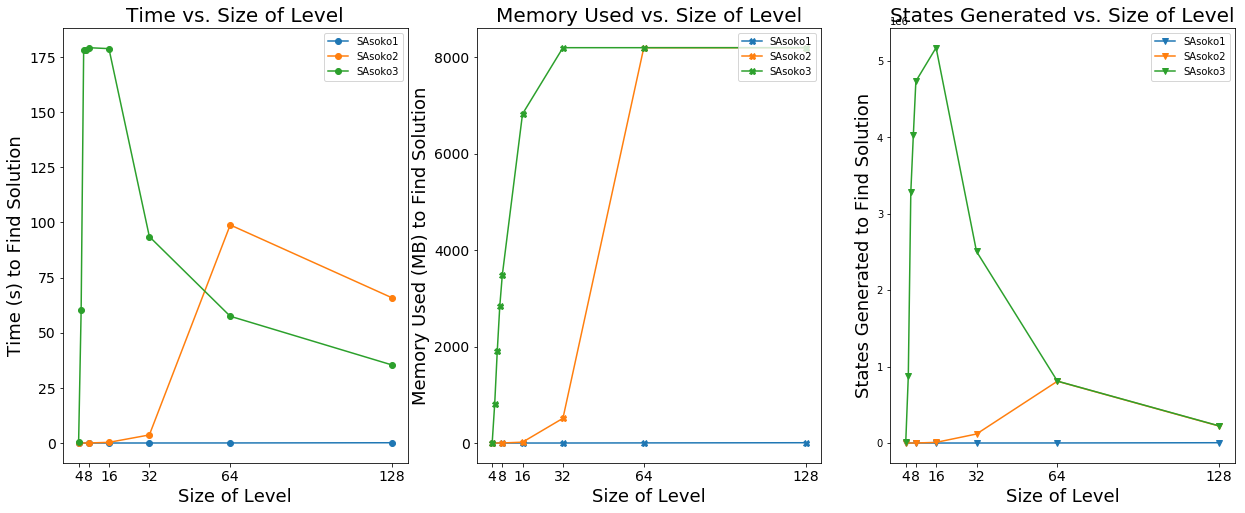

In [121]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

df = pd.read_excel (r'benchmarks.xlsx', skiprows=47)
del df['Unnamed: 0']
df.columns = [c.replace(' ', '_') for c in df.columns]
df = df[0:21]
print(df)
print(df.columns)


sizes1 = [int(df['Size'][i]) for i in range(0, 6)]
sizes2 = [int(df['Size'][i]) for i in range(6, 12)]
sizes3 = [int(df['Size'][i]) for i in range(12, 21)]
times1 = [float(df['Time_(s)'][i]) for i in range(0, 6)]
times2 = [float(df['Time_(s)'][i]) for i in range(6, 12)]
times3 = [float(df['Time_(s)'][i]) for i in range(12, 21)]
mem1 = [float(df['Memory_Used_(MB)'][i]) for i in range(0, 6)]
mem2 = [float(df['Memory_Used_(MB)'][i]) for i in range(6, 12)]
mem3 = [float(df['Memory_Used_(MB)'][i]) for i in range(12, 21)]
states1 = [int(df['States_Generated'][i]) for i in range(0, 6)]
states2 = [int(df['States_Generated'][i]) for i in range(6, 12)]
states3 = [int(df['States_Generated'][i]) for i in range(12, 21)]

fig = plt.figure(figsize=(21,8))

plt.subplot(1, 3, 1)
plt.plot(sizes1,times1, label='SAsoko1', marker="o")
plt.plot (sizes2,times2, label='SAsoko2', marker="o")
plt.plot (sizes3,times3, label='SAsoko3', marker="o")

plt.legend(loc='upper right')
plt.xticks([4, 8, 16, 32, 64, 128], fontsize=14)
plt.xlabel('Size of Level', fontsize=18)
plt.ylabel('Time (s) to Find Solution', fontsize=18)
plt.yticks(fontsize=14)
plt.title('Time vs. Size of Level', fontsize=20)

plt.subplot(1, 3, 2)
plt.plot(sizes1, mem1, label='SAsoko1', marker="X")
plt.plot(sizes2, mem2, label='SAsoko2', marker="X")
plt.plot(sizes3, mem3, label='SAsoko3', marker="X")

plt.legend(loc='upper right')
plt.xticks([4, 8, 16, 32, 64, 128], fontsize=14)
plt.xlabel('Size of Level', fontsize=18)
plt.ylabel('Memory Used (MB) to Find Solution', fontsize=18)
plt.yticks(fontsize=14)
plt.title('Memory Used vs. Size of Level', fontsize=20)

plt.subplot(1, 3, 3)
plt.plot(sizes1, states1, label='SAsoko1', marker="v")
plt.plot(sizes2, states2, label='SAsoko2', marker="v")
plt.plot(sizes3, states3, label='SAsoko3', marker="v")

plt.legend(loc='upper right')
plt.xticks([4, 8, 16, 32, 64, 128], fontsize=14)
plt.xlabel('Size of Level', fontsize=18)
plt.ylabel('States Generated to Find Solution', fontsize=18)
plt.title('States Generated vs. Size of Level', fontsize=20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.show()
fig.savefig('SAsoko_distributions.jpg')